In [1]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import circuit_drawer, plot_bloch_multivector, plot_histogram
from qiskit.visualization import plot_state_city, plot_state_qsphere
#plot_state_city is for density matrix plot
#plot_state_qsphere used for multi qubit visualization
from math import pi, sqrt
import pylatexenc
from pylatexenc.latex2text import LatexNodes2Text

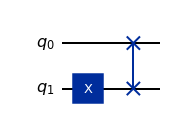

In [3]:
# swap gate on |01> = |10> (|01> is qiskit ordering)
qc_sw= QuantumCircuit(2, name = "qc")
qc_sw.x(1) # X gate on second qubit
qc_sw.swap(0,1) # swap gate operation
qc_sw.draw(output='mpl')

# Density plot for swap gate


Quantum state is:  Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


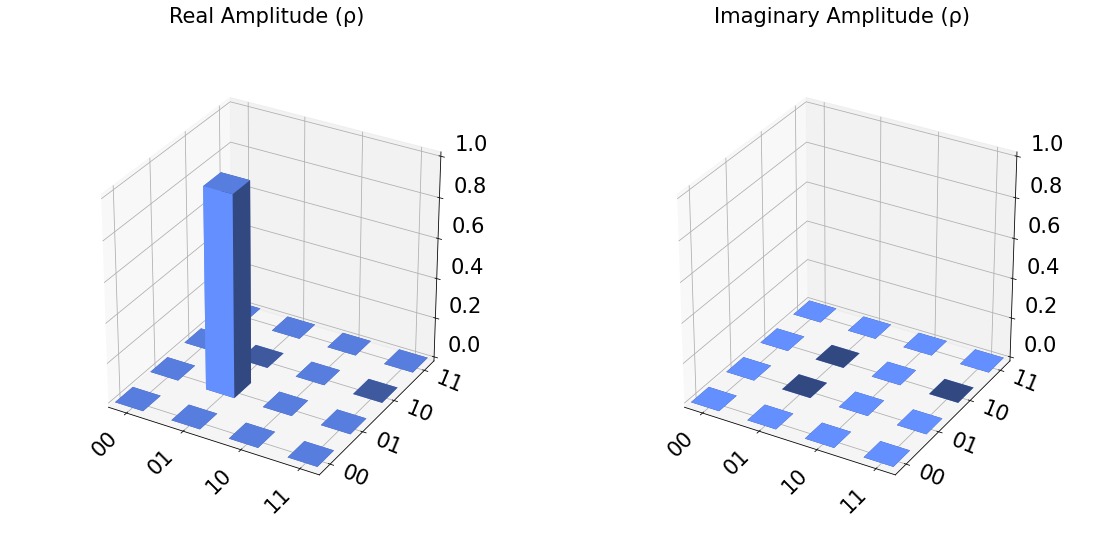

In [4]:
# to get the eigenvector you should use the statevecto simulator in the core of the circuit
simulator_state = Aer.get_backend('statevector_simulator')

#execute the circuit
sw_gate = transpile(qc_sw, simulator_state)
job = simulator_state.run(sw_gate)

#grab results from the job
result = job.result()

#returns counts
psi= result.get_statevector(qc_sw)
print("\nQuantum state is: ", psi)

#plot a density matrix_plot
plot_state_city(psi)

# QSphere plot for SWAP gate

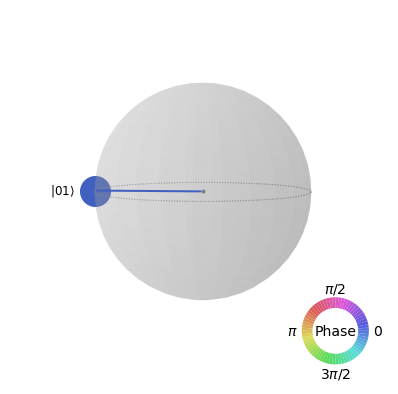

In [5]:
psi = result.get_statevector(qc_sw)
plot_state_qsphere(psi)

# Unitary operator for SWAP gate

In [6]:
backend = Aer.get_backend('unitary_simulator')

#execute the circuit
sw_unitary = transpile(qc_sw, backend)
job = backend.run(sw_unitary)
job.result().get_unitary(qc_sw, decimals = 3)

Operator([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


# Running SWAP gate circuit using QASM simulator

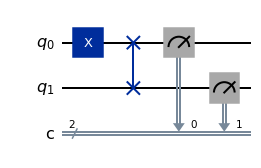

In [7]:
qc_sw = QuantumCircuit(2, 2, name = "qc")
qc_sw.x(0)
qc_sw.swap(0,1)
qc_sw.measure([0,1], [0,1])
qc_sw.draw('mpl')

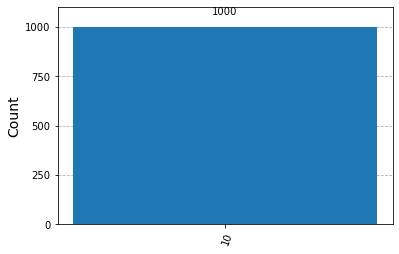

In [8]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

histo_job = transpile(qc_sw, backend)

job = backend.run(histo_job, shots = 1000)

result = job.result()

counts = result.get_counts(qc_sw)

plot_histogram (counts)

# SWAP gate using CNOT gates: 1st Method

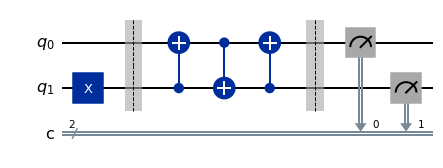

In [9]:
qc_sw = QuantumCircuit(2, 2, name = "qc")
qc_sw.x(1)
qc_sw.barrier()
qc_sw.cx(1,0) # CNOT with 1st as target and 2nd as control
qc_sw.cx(0,1) # CNOT with 1st as control and 2nd as target
qc_sw.cx(1,0) # CNOT with 1st as target and 2nd as control
qc_sw.barrier()
qc_sw.measure([0,1], [0,1])
qc_sw.draw('mpl')

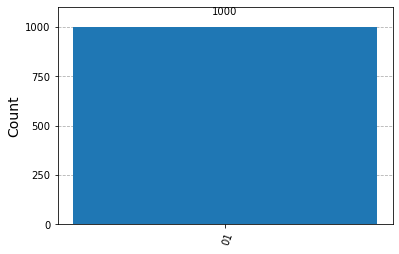

In [10]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

histo_job = transpile(qc_sw, backend)

job = backend.run(histo_job, shots = 1000)

result = job.result()

counts = result.get_counts(qc_sw)

plot_histogram (counts)

# SWAP gate using CNOT gates: 2nd Method

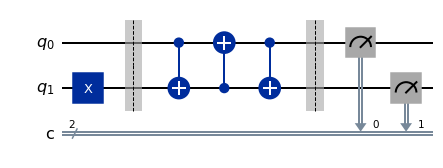

In [11]:
qc_sw = QuantumCircuit(2, 2, name = "qc")
qc_sw.x(1)
qc_sw.barrier()
qc_sw.cx(0,1) # CNOT with 1st as control and 2nd as target
qc_sw.cx(1,0) # CNOT with 1st as target and 2nd as control
qc_sw.cx(0,1) # CNOT with 1st as control and 2nd as target
qc_sw.barrier()
qc_sw.measure([0,1], [0,1])
qc_sw.draw('mpl')

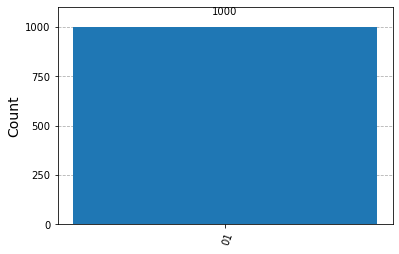

In [12]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

histo_job = transpile(qc_sw, backend)

job = backend.run(histo_job, shots = 1000)

result = job.result()

counts = result.get_counts(qc_sw)

plot_histogram (counts)

# The Bell State

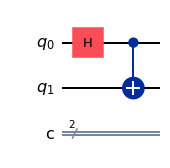

In [14]:
qc_bell= QuantumCircuit(2, 2, name = "qc")
qc_bell.h(0) # H gate on 1st qubit
qc_bell.cx(0,1) # CNOT with 1st as control and 2nd as target
qc_bell.draw(output='mpl')

# Density matrix plot fro the Bell State


Quantum state is:  Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


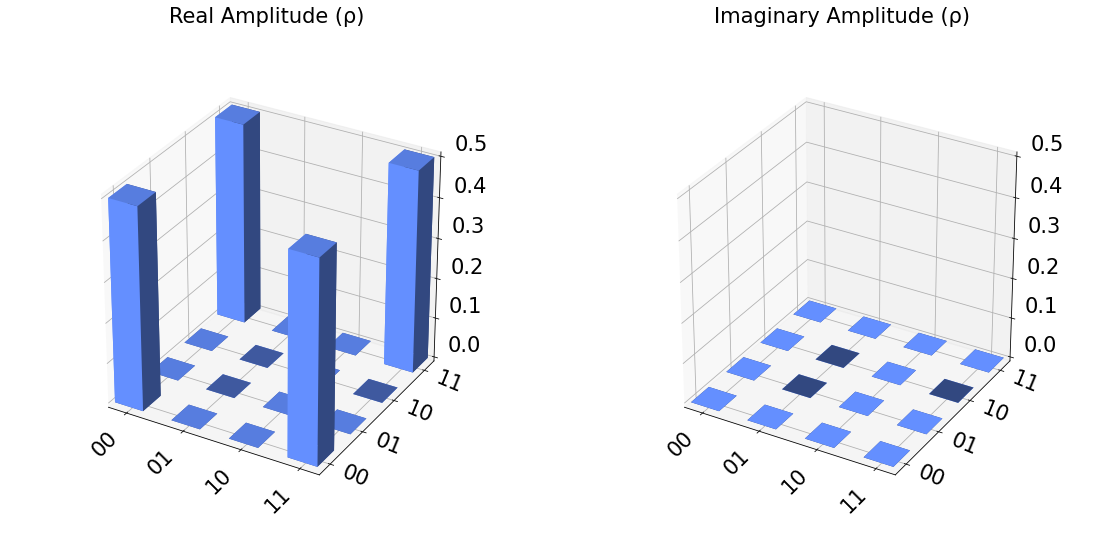

In [16]:
# to get the eigenvector you should use the statevecto simulator in the core of the circuit
simulator_state = Aer.get_backend('statevector_simulator')

#execute the circuit
bell_state = transpile(qc_bell, simulator_state)
job = simulator_state.run(bell_state)

#grab results from the job
result = job.result()

#returns counts
psi= result.get_statevector(qc_bell)
print("\nQuantum state is: ", psi)

#plot a density matrix_plot
plot_state_city(psi)

# QSphere plot for the Bell State

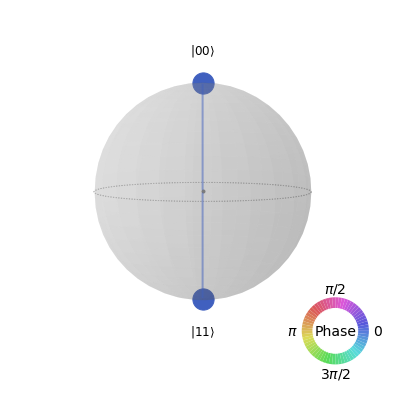

In [17]:
psi = result.get_statevector(qc_bell)
plot_state_qsphere(psi)
# they have the same color so we have two states and positive values

# Unitary operator for the Bell State

In [18]:
backend = Aer.get_backend('unitary_simulator')

#execute the circuit
bell_unitary = transpile(qc_bell, backend)
job = backend.run(bell_unitary)
job.result().get_unitary(qc_bell, decimals = 3)

Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


# Running Bell State circuit using QASM simulator

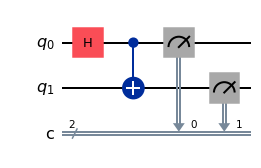

In [19]:
# CNOT with measurement
qc_bell = QuantumCircuit(2, 2, name = "qc")
qc_bell.h(0) # H gate on 1st qubit
qc_bell.cx(0,1) # CNOT with 1st as control and 2nd as target
qc_bell.measure([0,1], [0,1])
qc_bell.draw('mpl')

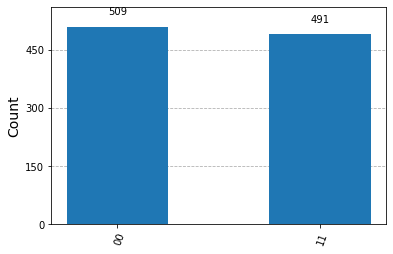

In [20]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

histo_job = transpile(qc_bell, backend)

job = backend.run(histo_job, shots = 1000)

result = job.result()

counts = result.get_counts(qc_bell)

plot_histogram (counts)

# Quantum CCX/CCNOT or Toffoli Gate

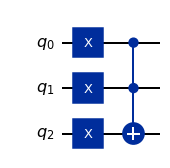

In [22]:
# ccx-gate on |111> = |110> (|011> in Qiskit ordering)
qc_ccx = QuantumCircuit(3, name = "qc")
qc_ccx.x(0)
qc_ccx.x(1)
qc_ccx.x(2)
qc_ccx.ccx(0,1,2)
qc_ccx.draw('mpl')

# Density matrix plot fro CCX gate


Quantum state is:  Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


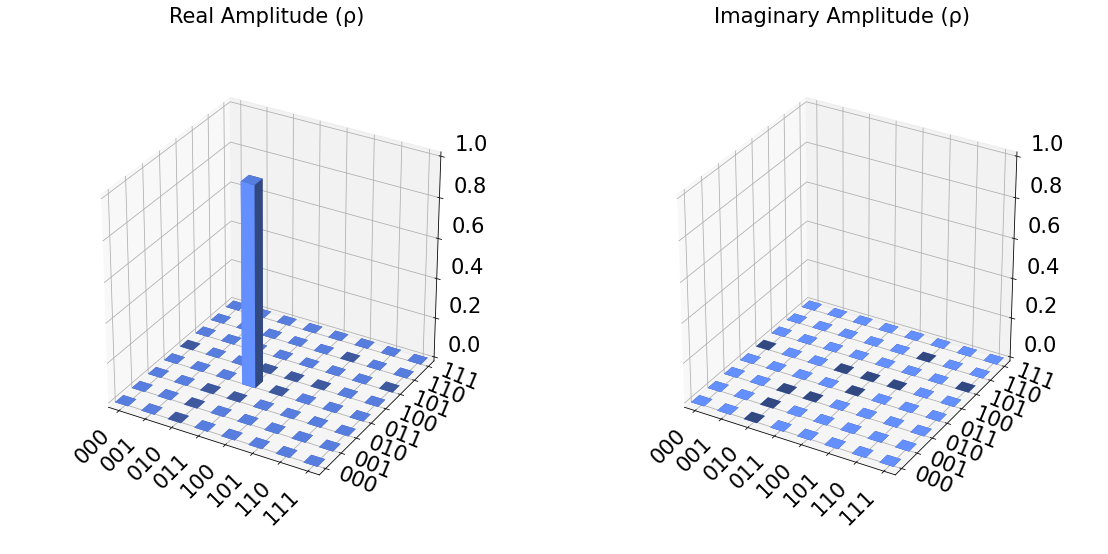

In [23]:
# to get the eigenvector you should use the statevecto simulator in the core of the circuit
simulator_state = Aer.get_backend('statevector_simulator')

#execute the circuit
ccx_gate = transpile(qc_ccx, simulator_state)
job = simulator_state.run(ccx_gate)

#grab results from the job
result = job.result()

#returns counts
psi= result.get_statevector(qc_ccx)
print("\nQuantum state is: ", psi)

#plot a density matrix_plot
plot_state_city(psi)

# QSphere plot for CCX gate

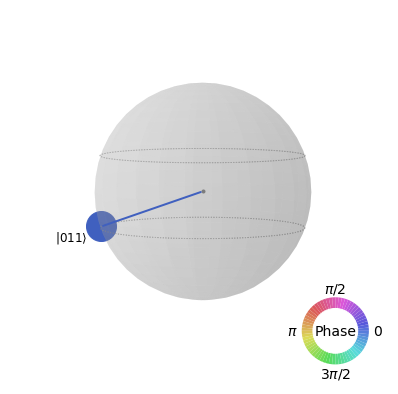

In [24]:
psi = result.get_statevector(qc_ccx)
plot_state_qsphere(psi)

# Unitary operator for CCX gate

In [25]:
backend = Aer.get_backend('unitary_simulator')

#execute the circuit
ccx_unitary = transpile(qc_ccx, backend)
job = backend.run(ccx_unitary)
job.result().get_unitary(qc_ccx, decimals = 3)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


# Running CCX gate circuit using QASM simulator



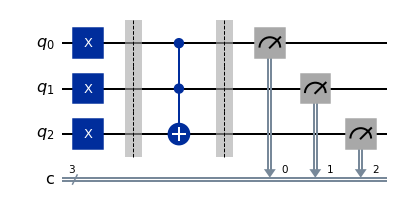

In [26]:
qc_ccx = QuantumCircuit(3,3, name = "qc")
qc_ccx.x(0)
qc_ccx.x(1)
qc_ccx.x(2)
qc_ccx.barrier()
qc_ccx.ccx(0,1,2) # CCX with 1st two qubits as control and 3rd as target
qc_ccx.barrier()
qc_ccx.measure([0,1,2], [0,1,2])
qc_ccx.draw('mpl')

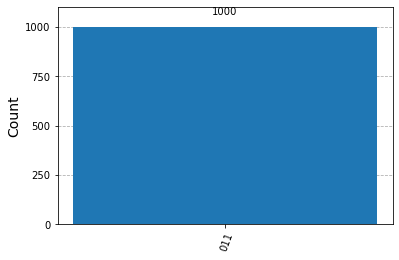

In [27]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

histo_job = transpile(qc_ccx, backend)

job = backend.run(histo_job, shots = 1000)

result = job.result()

counts = result.get_counts(qc_ccx)

plot_histogram (counts)

# Quantum CSWAP or Fredkin Gate

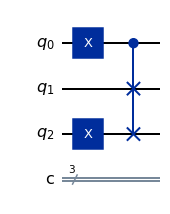

In [28]:
# CSWAP Gate on |101> = |110> (|011> in Qiskit ordering)
qc_csw = QuantumCircuit(3, 3, name = "qc")
qc_csw.x(0)
qc_csw.x(2)
qc_csw.cswap(0,1,2) #CSWAP gate with 1st qubit as control and 2nd & 3rd being swapped
qc_csw.draw('mpl')

# Density matrix plot fro  CSWAP gate


Quantum state is:  Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


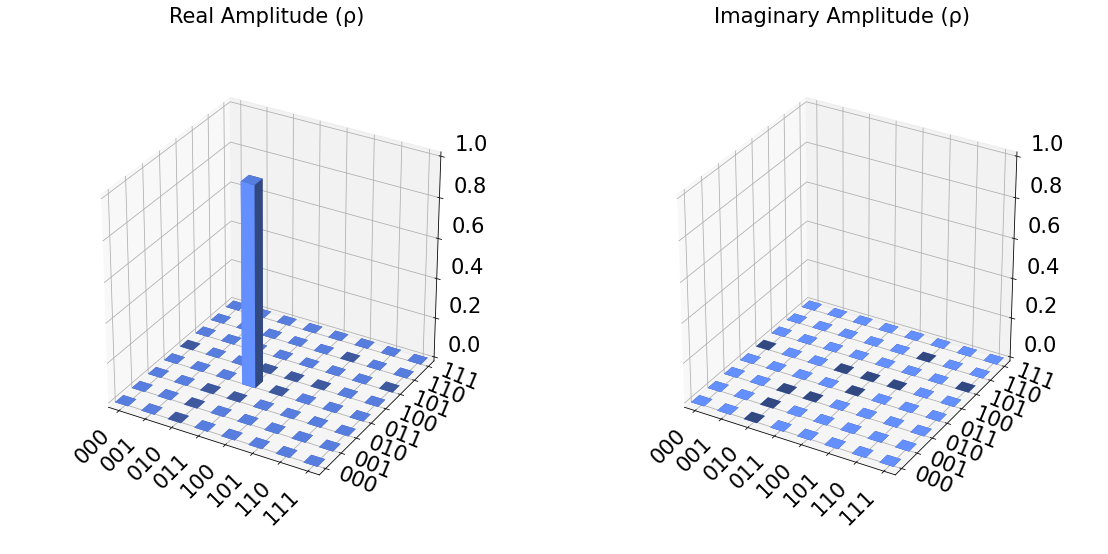

In [29]:
# to get the eigenvector you should use the statevecto simulator in the core of the circuit
simulator_state = Aer.get_backend('statevector_simulator')

#execute the circuit
csw_gate = transpile(qc_csw, simulator_state)
job = simulator_state.run(csw_gate)

#grab results from the job
result = job.result()

#returns counts
psi= result.get_statevector(qc_csw)
print("\nQuantum state is: ", psi)

#plot a density matrix_plot
plot_state_city(psi)

# QSphere plot for CSWAP

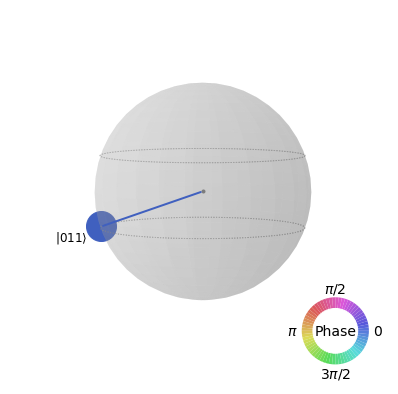

In [30]:
psi = result.get_statevector(qc_csw)
plot_state_qsphere(psi)

# Unitary operator for CSWAP gate

In [32]:
backend = Aer.get_backend('unitary_simulator')

#execute the circuit
csw_unitary = transpile(qc_csw, backend)
job = backend.run(csw_unitary)
job.result().get_unitary(qc_csw, decimals = 3)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


# Running CSWAP circuit using QASM simulator



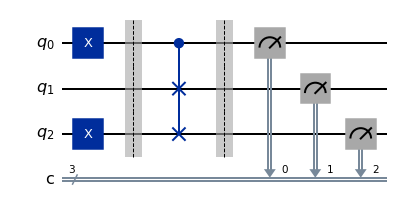

In [33]:
# CSWAP Gate on |101> = |110> (|011> in Qiskit ordering)
qc_csw = QuantumCircuit(3, 3, name = "qc")
qc_csw.x(0)
qc_csw.x(2)
qc_csw.barrier()
qc_csw.cswap(0,1,2) # CSWAP with 1st qubit as control and 2nd & 3rd being swapped
qc_csw.barrier()
qc_csw.measure([0,1,2], [0,1,2])
qc_csw.draw('mpl')

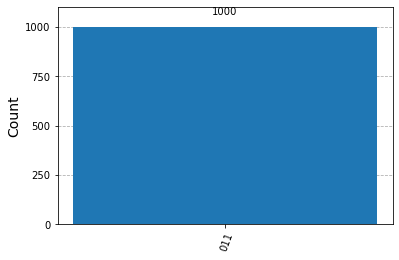

In [34]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

histo_job = transpile(qc_csw, backend)

job = backend.run(histo_job, shots = 1000)

result = job.result()

counts = result.get_counts(qc_csw)

plot_histogram (counts)